사용하고자 하는 변수중요도 방법론으로는 랜덤포레스트를 활용하고자 한다.

## 1. 데이터불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('C:/Users/lucky/바탕 화면/Capstone-Design/processed_data_2.xlsx',header=0)

In [3]:
data

,mod_d,region,town_t,apt_t,psu,sex,age,incm,ho_incm,incm5,...,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE,target
0,2020.03.05.,1,1,2,A901,1,80,1,1,2,...,1,2,1,2,88,8,1,2,1,저
1,2020.03.05.,1,1,2,A901,1,78,4,4,5,...,1,2,2,8,88,8,1,1,1,고
2,2020.03.05.,1,1,2,A901,2,75,4,4,5,...,2,2,2,8,88,8,1,1,1,고
3,2020.03.05.,1,1,2,A901,2,80,2,1,2,...,1,2,2,8,88,8,1,1,1,고
4,2020.03.05.,1,1,2,A901,2,71,1,1,2,...,2,1,2,8,88,8,1,1,1,저
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2020.03.05.,8,1,2,R904,1,1,3,3,4,...,1,3,3,8,88,8,1,1,1,저
6074,2020.03.05.,8,1,2,R904,2,73,2,1,2,...,2,2,1,2,88,8,1,1,1,저
6075,2020.03.05.,8,1,2,R904,1,43,3,4,4,...,2,2,1,2,88,8,1,1,2,고
6076,2020.03.05.,8,1,2,R904,1,10,3,4,4,...,2,2,2,8,88,8,1,1,2,고


## 2. 로지스틱 회귀 이용하기

## RandomForest

### 중요도가 높은 변수 추출하기

In [4]:
data.drop(['mod_d'], axis='columns', inplace=True)

In [5]:
data.drop(['psu'], axis='columns', inplace=True)

- 필요없는 'mod_d' 변수를 지워준다.
- object type인 'psu' 변수를 지워준다.

In [6]:
from sklearn.ensemble import RandomForestClassifier #분류트리(모델) 
from sklearn.model_selection import train_test_split # train / test
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score

In [7]:
# 1. train/test
X = data.drop(['target'], axis=1)
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6078 entries, 0 to 6077
Columns: 365 entries, region to LF_SAFE
dtypes: int64(365)
memory usage: 16.9 MB


In [10]:
# 2. RF model 생성 
# 분류 트리(default) 객체 생성
model = RandomForestClassifier(n_estimators=400, min_samples_split=3) 
model.fit(X=X_train, y=y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=400)

In [11]:
# 3. model의 중요변수
imp = model.feature_importances_
imp

array([1.68475153e-02, 3.22039818e-03, 4.33244164e-03, 6.83021493e-03,
       2.54932642e-02, 8.91237385e-03, 8.31138499e-03, 1.08229710e-02,
       1.11649798e-02, 8.51693394e-03, 1.11278213e-02, 9.42973609e-03,
       1.88205539e-03, 7.55083310e-03, 7.07749688e-03, 4.89892823e-03,
       1.34338879e-03, 3.45198135e-03, 7.62456029e-03, 5.74142809e-03,
       3.28664000e-03, 1.05106048e-02, 3.48846419e-03, 1.79878864e-03,
       2.39502937e-03, 2.54080277e-03, 2.77085275e-03, 1.87743221e-03,
       2.38611455e-03, 2.48805341e-03, 2.97138834e-03, 6.19167913e-04,
       6.71433766e-04, 7.73714495e-04, 8.66638349e-04, 7.28247205e-04,
       7.26173180e-04, 8.33120732e-04, 3.92024887e-04, 3.05140630e-04,
       3.86699634e-04, 5.45068413e-04, 6.95276406e-04, 6.81726613e-04,
       1.35098813e-03, 2.06218540e-03, 2.24038551e-03, 1.34476930e-03,
       1.65234214e-03, 1.93832621e-03, 8.94215858e-04, 1.06666879e-03,
       1.14695805e-03, 2.04175419e-03, 2.68757910e-03, 2.80968952e-03,
      

In [12]:
colnames = data.columns

In [13]:
len(imp)

365

In [14]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x2647e6acb80>,
 [Text(0, 0, 'region'),
  Text(0, 0, 'town_t'),
  Text(0, 0, 'apt_t'),
  Text(0, 0, 'sex'),
  Text(0, 0, 'age'),
  Text(0, 0, 'incm'),
  Text(0, 0, 'ho_incm'),
  Text(0, 0, 'incm5'),
  Text(0, 0, 'ho_incm5'),
  Text(0, 0, 'edu'),
  Text(0, 0, 'cfam'),
  Text(0, 0, 'genertn'),
  Text(0, 0, 'allownc'),
  Text(0, 0, 'house'),
  Text(0, 0, 'live_t'),
  Text(0, 0, 'ainc_unit1'),
  Text(0, 0, 'marri_1'),
  Text(0, 0, 'marri_2'),
  Text(0, 0, 'fam_rela'),
  Text(0, 0, 'tins'),
  Text(0, 0, 'npins'),
  Text(0, 0, 'D_1_1'),
  Text(0, 0, 'D_2_1'),
  Text(0, 0, 'DI1_dg'),
  Text(0, 0, 'DI1_pr'),
  Text(0, 0, 'DI1_pt'),
  Text(0, 0, 'DI1_2'),
  Text(0, 0, 'DI2_dg'),
  Text(0, 0, 'DI2_pr'),
  Text(0, 0, 'DI2_pt'),
  Text(0, 0, 'DI2_2'),
  Text(0, 0, 'DI3_dg'),
  Text(0, 0, 'DI3_pr'),
  Text(0, 0, 'DI3_pt'),
  Text(0, 0, 'DI3_2'),
  Text(0, 0, 'DI4_dg'),
  Text(0, 0, 'DI4_pr'),
  Text(0, 0, 'DI4_pt'),
  Text(0, 0, 'DI5_dg'),
  Text(0, 0, 'DI5_pr'),
  Text(

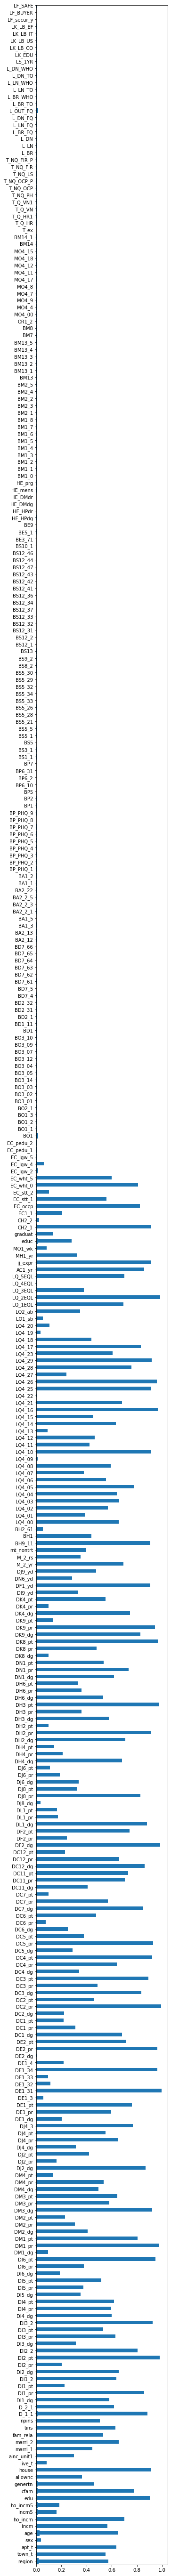

In [15]:
N = 200
s = pd.Series(np.random.sample(N))
fig, ax = plt.subplots(figsize=(5,0.5*N))
s.plot.barh(ax=ax)
plt.barh(range(365), imp) # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(range(365), colnames) # 축 이름

### 모델 평가하기

In [16]:
y_pred = model.predict(X = X_test)
y_true = y_test

In [17]:
acc = accuracy_score(y_true, y_pred)

In [18]:
print('분류정확도 =', acc) 

분류정확도 = 0.7297149122807017


In [19]:
con_mat = confusion_matrix(y_true, y_pred)
con_mat

array([[1279,   25,    0],
       [ 253,   52,    0],
       [ 204,   11,    0]], dtype=int64)

In [20]:
report = classification_report(y_true, y_pred)

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
report

'              precision    recall  f1-score   support\n\n           고       0.74      0.98      0.84      1304\n           저       0.59      0.17      0.26       305\n           중       0.00      0.00      0.00       215\n\n    accuracy                           0.73      1824\n   macro avg       0.44      0.38      0.37      1824\nweighted avg       0.63      0.73      0.65      1824\n'